Bibliotecas utilizadas: Pandas (Manipulação de dados), Numpy (Manipulação numérica), Statsmodels(Módulo estatístico), sklearn (Módulo de machine learning), Matplotlib (Representações gráficas)

In [1]:
import pandas as pd
import numpy as np
import collections
#import unidecode
import statsmodels.api as sm
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

Leitura dos cabeçalhos dos arquivos CSV do projeto

In [2]:
df1Header = pd.read_csv('Consolidado final/Novo2016.csv', delimiter=";", decimal=",", low_memory=False, encoding='utf_8');
df2Header = pd.read_csv('Consolidado final/Novo2017.csv', delimiter=";", decimal=",", low_memory=False, encoding='utf_8');

float_cols = [c for c in df1Header if df1Header[c].dtype == "float64"]
float32_cols = {c: np.float32 for c in float_cols}
obj_cols = [c for c in df1Header if df1Header[c].dtype == "object"]



Leitura dos arquivos CSV do projeto

In [3]:
df1 = pd.read_csv('Consolidado final/Novo2016.csv', delimiter=";", decimal=",", low_memory=False, encoding='utf_8', engine='c', dtype=float32_cols);
df2 = pd.read_csv('Consolidado final/Novo2017.csv', delimiter=";", decimal=",", low_memory=False, encoding='utf_8', engine='c', dtype=float32_cols);

In [5]:
print df1.shape
print df2.shape

(499002, 66)
(650559, 66)


Concatenação dos arquivos lidos

In [6]:
StockoutDataset = pd.concat([df1, df2])
print StockoutDataset.shape

(1149561, 66)


Arredondamento de variáveis para duas casas decimais

In [7]:
StockoutDataset.round(2)

C:\Users\Pichau\Anaconda2\lib\site-packages\pandas\core\series.py:1826: RuntimeWarning: invalid value encountered in rint
  result = com._values_from_object(self).round(decimals)


,Mes_Ano,Data_Referencia,Centro,Material,Tipo_MRP,Status do item,Unidade de medida,Nivel_Minimo,Nivel_Maximo,Multiplo_Compra,...,Distribuicao,Reserva_Entre 30 e 60 Dias,Reserva_Entre 60 e 90 Dias,Reserva_Mais de 90 Dias,Atender mais de 30 Dias,Cobertura_Nivel_Maximo,PRIORIDADE,N_Eventos_Zerados_12Meses,Estrategia_Gestao,Stockout
0,4.2016,01.04.2016,4127,15196700,ZV - Estocavel e Planejavel,10,PC,10.0,11.0,1.0,...,LUBRIFICANTE,0.0,0.0,0.0,0.0,1.69,P2,1,GERAL,0
1,4.2016,01.04.2016,4127,15197707,ZV - Estocavel e Planejavel,10,PC,1.0,1.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,0.00,P2,0,GERAL,0
2,4.2016,01.04.2016,4127,15197712,ZV - Estocavel e Planejavel,10,PC,1.0,1.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,0.00,P2,0,GERAL,0
3,4.2016,01.04.2016,4127,15197723,ZV - Estocavel e Planejavel,10,PC,1.0,1.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,0.00,P2,0,GERAL,0
4,4.2016,01.04.2016,4127,15197746,ZV - Estocavel e Planejavel,10,PC,1.0,1.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,0.00,P2,0,GERAL,0
5,4.2016,01.04.2016,4127,15197753,ZV - Estocavel e Planejavel,10,PC,1.0,1.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,0.00,P2,0,GERAL,0
6,4.2016,01.04.2016,4127,15197778,ZV - Estocavel e Planejavel,10,PC,1.0,1.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,0.00,P2,0,GERAL,0
7,4.2016,01.04.2016,4127,15197785,ZV - Estocavel e Planejavel,10,PC,1.0,1.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,0.00,P2,0,GERAL,0
8,4.2016,01.04.2016,4127,15197786,ZV - Estocavel e Planejavel,10,PC,1.0,1.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,0.00,P2,0,GERAL,0
9,4.2016,01.04.2016,4127,15198915,ZV - Estocavel e Planejavel,10,PC,2.0,12.0,1.0,...,GERAL,0.0,0.0,0.0,0.0,14.40,P2,0,GERAL,0


Impressão das colunas

In [8]:
StockoutDataset.columns

Index([u'Mes_Ano', u'Data_Referencia', u'Centro', u'Material', u'Tipo_MRP',
       u'Status do item', u'Unidade de medida', u'Nivel_Minimo',
       u'Nivel_Maximo', u'Multiplo_Compra', u'Estoque', u'Potencial',
       u'Demanda', u'Quantidade_Repor', u'Lead time', u'Criticidade', u'PMU',
       u'PUC', u'PMM', u'Cons_Mes_Atual', u'M01', u'M02', u'M03', u'M04',
       u'M05', u'M06', u'M07', u'M08', u'M09', u'M10', u'M11', u'M12', u'M13',
       u'M14', u'M15', u'M16', u'M17', u'M18', u'M19', u'M20', u'M21', u'M22',
       u'M23', u'M24', u'Cons24Meses', u'ConsMedioMensal24', u'Giro24Meses',
       u'Cons12Meses', u'ConsMedioMensal12', u'Giro12Meses', u'Cons6Meses',
       u'ConsMedioMensal6', u'Giro6Meses', u'Fabricante', u'Item importado',
       u'Estq_Seguranca', u'Distribuicao', u'Reserva_Entre 30 e 60 Dias',
       u'Reserva_Entre 60 e 90 Dias', u'Reserva_Mais de 90 Dias',
       u'Atender mais de 30 Dias', u'Cobertura_Nivel_Maximo', u'PRIORIDADE',
       u'N_Eventos_Zerados_12Mes

Impressão dos tipos das colunas

In [9]:
print StockoutDataset.dtypes

Mes_Ano                        object
Data_Referencia                object
Centro                          int64
Material                        int64
Tipo_MRP                       object
Status do item                  int64
Unidade de medida              object
Nivel_Minimo                  float32
Nivel_Maximo                  float32
Multiplo_Compra               float32
Estoque                       float32
Potencial                     float32
Demanda                       float32
Quantidade_Repor              float32
Lead time                     float32
Criticidade                    object
PMU                           float32
PUC                           float32
PMM                           float32
Cons_Mes_Atual                float32
M01                           float32
M02                           float32
M03                           float32
M04                           float32
M05                           float32
M06                           float32
M07         

Separação entre variáveis numéricas e categóricas

In [10]:
#'Distribuição', 'Mês_Ano' com erro
CategoricalVariables =['Mes_Ano','Centro', 'Material', 'Status do item', 'Unidade de medida', 'Criticidade', 'Giro24Meses', 'Giro12Meses', 'Giro6Meses', 'Item importado', 'PRIORIDADE', 'Estrategia_Gestao']
NumericalVariables = ['Nivel_Minimo', 'Nivel_Maximo', 'Multiplo_Compra', 'Estoque', 'Potencial','Demanda', 'Quantidade_Repor', 'Lead time', 'PMU','PUC', 'PMM', 'Cons_Mes_Atual', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'ConsMedioMensal24', 'Cons24Meses', 'ConsMedioMensal12', 'Cons12Meses', 'ConsMedioMensal6', 'Cons6Meses', 'Estq_Seguranca', 'Reserva_Entre 30 e 60 Dias',  'Reserva_Entre 60 e 90 Dias', 'Reserva_Mais de 90 Dias', 'Atender mais de 30 Dias', 'Cobertura_Nivel_Maximo', 'N_Eventos_Zerados_12Meses']
#DummyVariables = ['Centro', 'Tipo_MRP', 'Criticidade', 'Giro24Meses', 'Giro12Meses', 'Giro6Meses', 'Item importado', 'PRIORIDADE', 'Estrategia_Gestao']


Remoção de colunas desnecessária e substituição de valores faltantes

In [11]:
del StockoutDataset['Fabricante']
del StockoutDataset['Data_Referencia']
del StockoutDataset['Estq_Seguranca']

StockoutDataset['Lead time'].fillna(45, inplace=True)

#dummyStockoutDataset = pd.get_dummies(StockoutDataset[CategoricalVariables])

#NormalizedStockoutDataset = pd.concat([dummyStockoutDataset, StockoutDataset[NumericalVariables]], axis=1, sort=False) 
#print NormalizedStockoutDataset.shape

Análise de variáveis categóricas

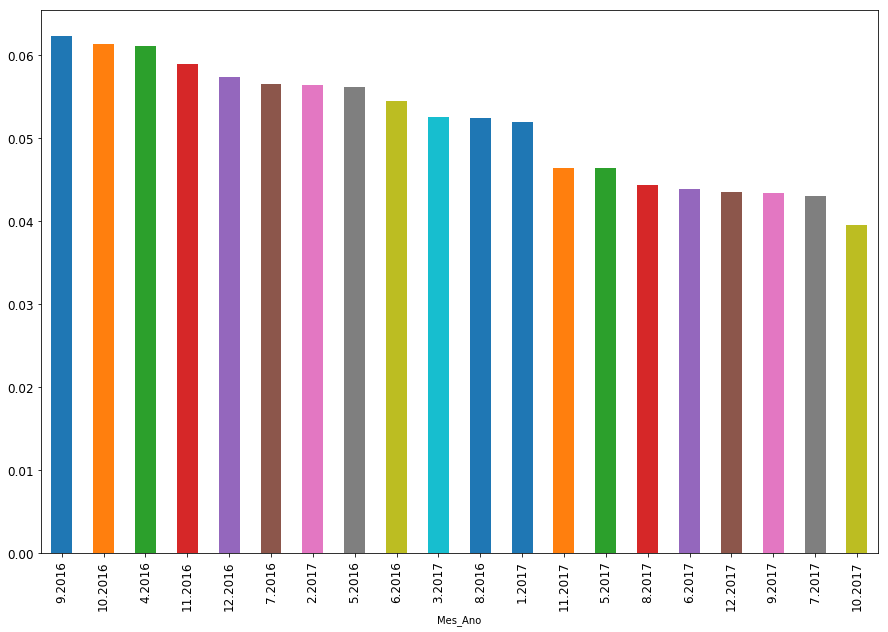

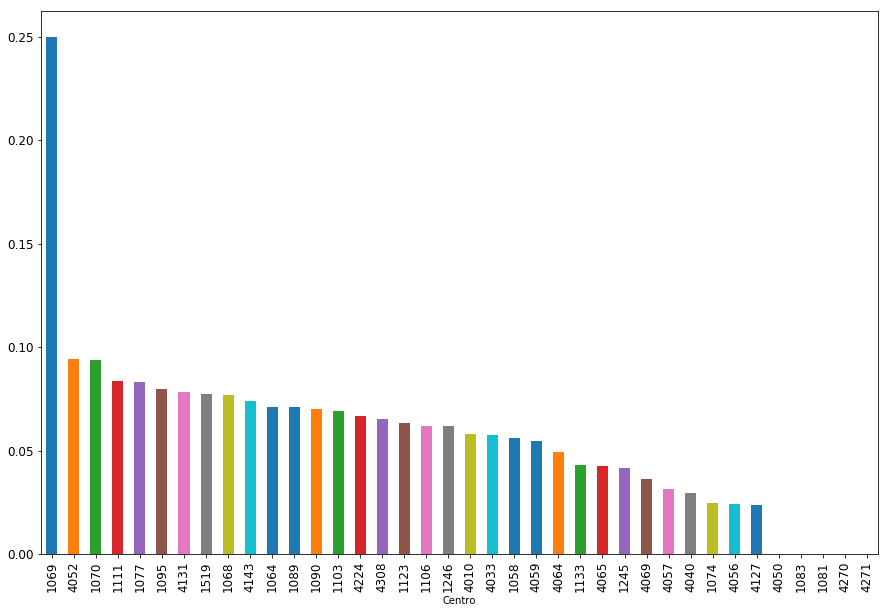

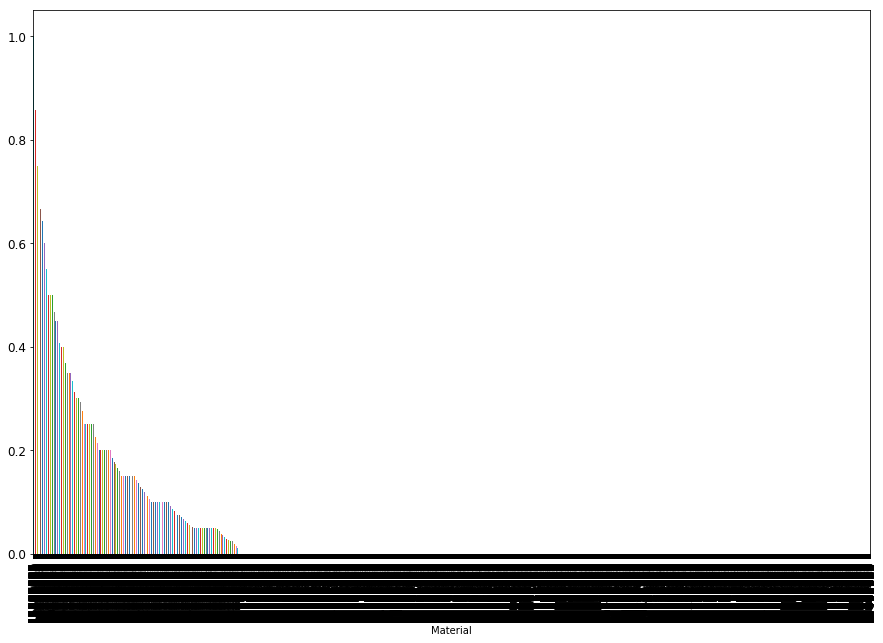

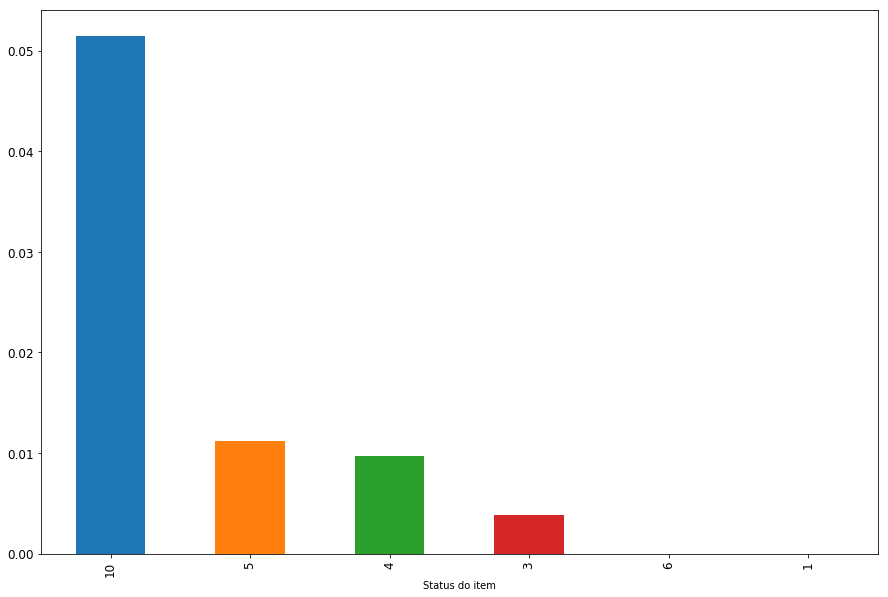

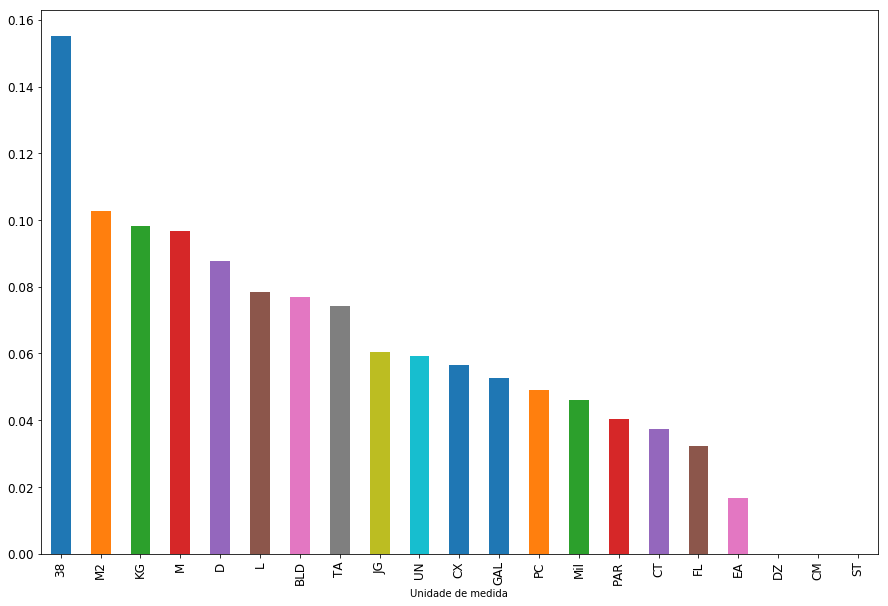

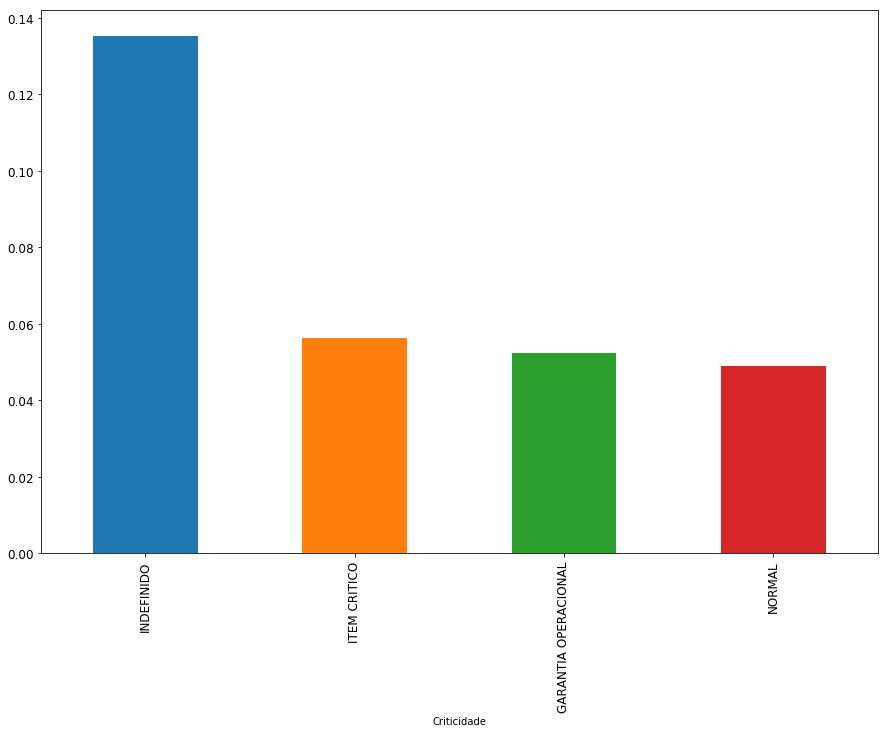

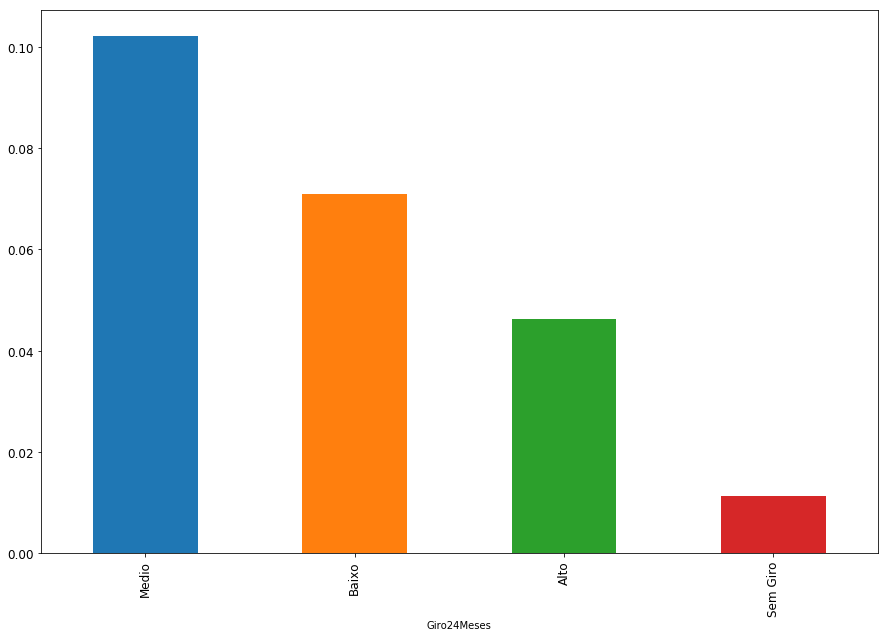

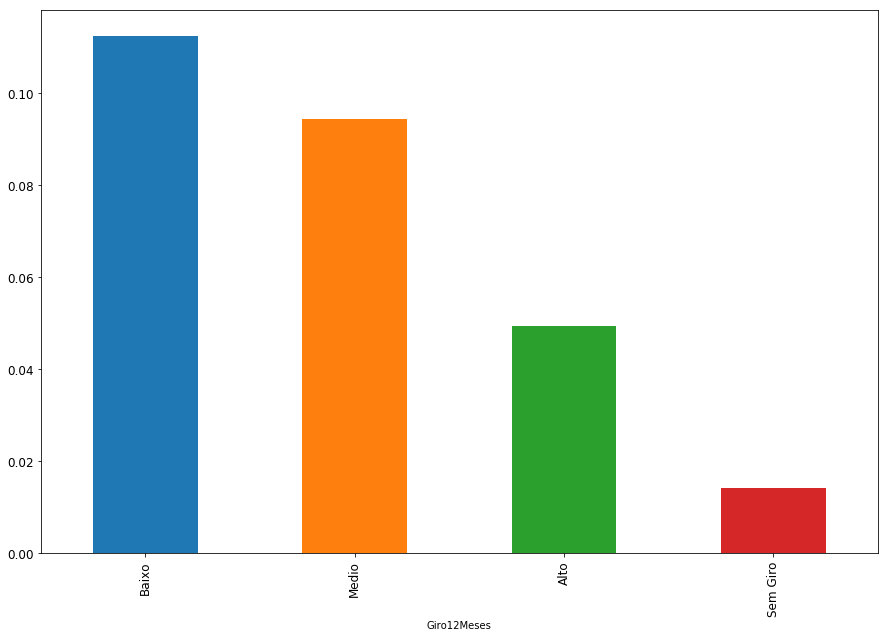

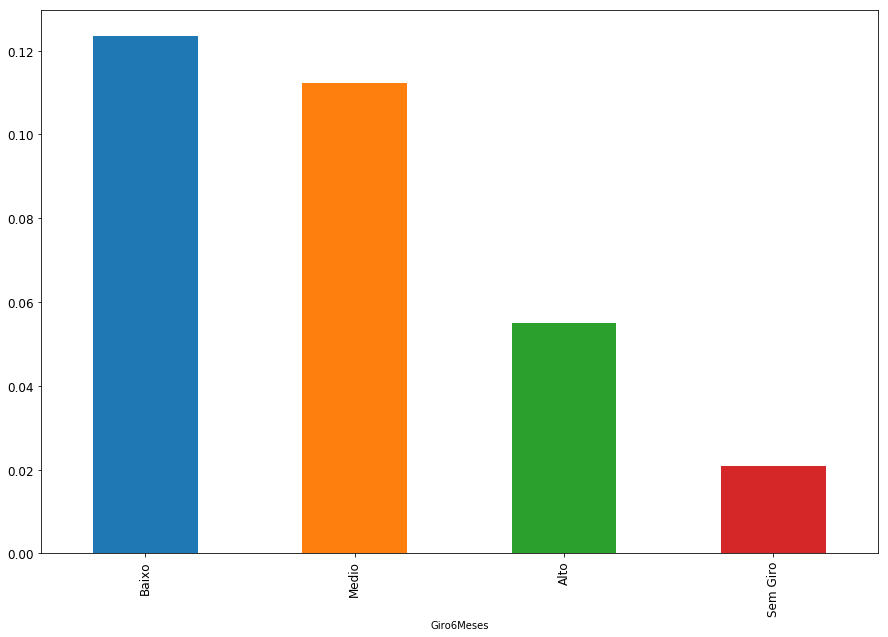

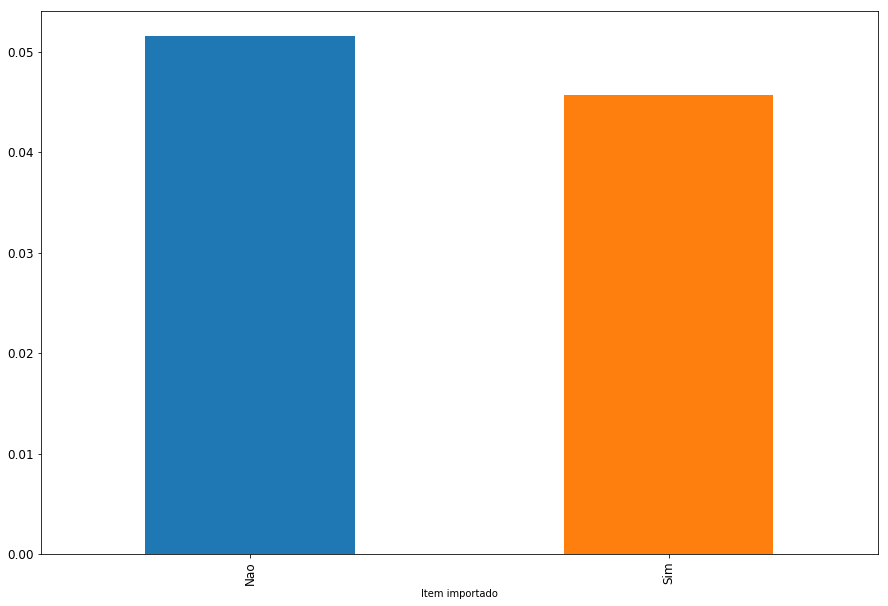

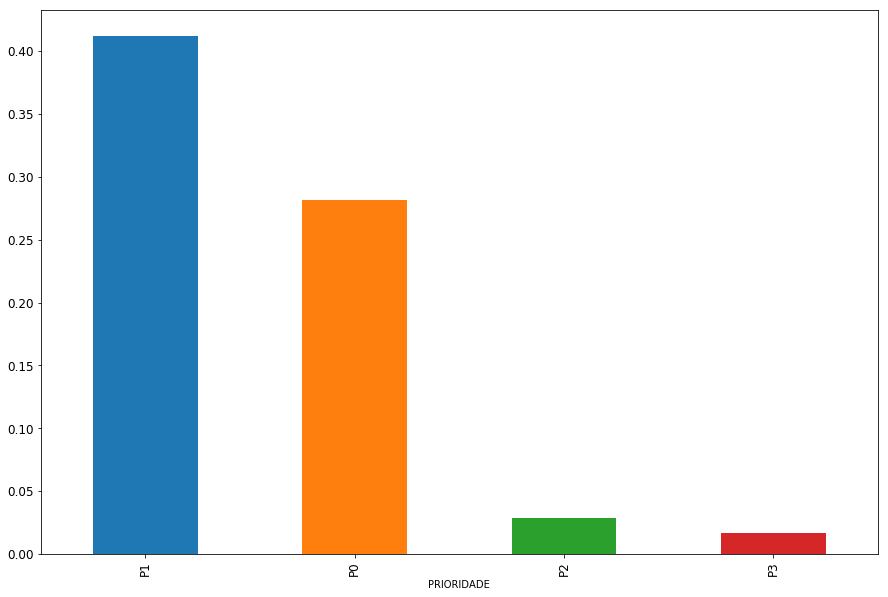

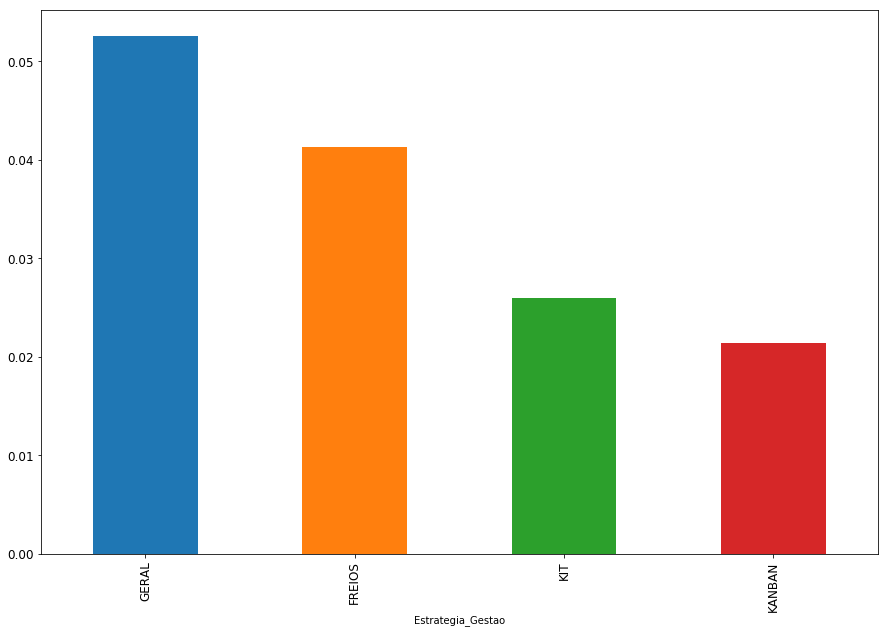

In [13]:
for variavel in CategoricalVariables:
    r = StockoutDataset[['Stockout', variavel]].groupby(variavel).mean()['Stockout'].sort_values(ascending=False)
    r.plot(kind='bar', figsize=(15, 10), legend=False, fontsize=12)
    plt.show()

Conversão das variáveis categóricas em seus equivalentes numéricos 

In [14]:
for col_name in obj_cols:
    if col_name != 'Fabricante' and col_name != 'Data_Referencia':
        StockoutDataset[col_name] = pd.Categorical(StockoutDataset[col_name]).codes

In [15]:
print StockoutDataset.dtypes

Mes_Ano                          int8
Centro                          int64
Material                        int64
Tipo_MRP                         int8
Status do item                  int64
Unidade de medida                int8
Nivel_Minimo                  float32
Nivel_Maximo                  float32
Multiplo_Compra               float32
Estoque                       float32
Potencial                     float32
Demanda                       float32
Quantidade_Repor              float32
Lead time                     float32
Criticidade                      int8
PMU                           float32
PUC                           float32
PMM                           float32
Cons_Mes_Atual                float32
M01                           float32
M02                           float32
M03                           float32
M04                           float32
M05                           float32
M06                           float32
M07                           float32
M08         

Separação entre as variáveis de entrada e sua classe

In [16]:
StockoutOutput = StockoutDataset['Stockout']
del StockoutDataset['Stockout']

Separação entre as variáveis de treino e teste

In [17]:
train_X = StockoutDataset[0:int(0.9*StockoutDataset.shape[0])]
train_Y = StockoutOutput[0:int(0.9*StockoutDataset.shape[0])]

print train_X.dtypes
print train_Y.dtypes

val_X = StockoutDataset[int(0.9*StockoutDataset.shape[0]):StockoutDataset.shape[0]]
val_Y = StockoutOutput[int(0.9*StockoutDataset.shape[0]):StockoutDataset.shape[0]]

Mes_Ano                          int8
Centro                          int64
Material                        int64
Tipo_MRP                         int8
Status do item                  int64
Unidade de medida                int8
Nivel_Minimo                  float32
Nivel_Maximo                  float32
Multiplo_Compra               float32
Estoque                       float32
Potencial                     float32
Demanda                       float32
Quantidade_Repor              float32
Lead time                     float32
Criticidade                      int8
PMU                           float32
PUC                           float32
PMM                           float32
Cons_Mes_Atual                float32
M01                           float32
M02                           float32
M03                           float32
M04                           float32
M05                           float32
M06                           float32
M07                           float32
M08         

Predição através do modelo random forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_Y)

melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_Y, melb_preds))

print classification_report(val_Y, melb_preds.round(0))

0.0507033064537
             precision    recall  f1-score   support

          0       0.97      0.99      0.98    109762
          1       0.68      0.46      0.55      5195

avg / total       0.96      0.97      0.96    114957



Predição através do modelo random forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print(clf.feature_importances_)
print classification_report(val_Y, clf.predict(val_X))


[ 0.03994565  0.0246101   0.0347182   0.00050777  0.00116993  0.00455332
  0.01677275  0.01631129  0.00531063  0.11982047  0.01983847  0.01835267
  0.06324432  0.02707909  0.00705034  0.15633374  0.02277474  0.03754287
  0.01303682  0.00935839  0.00869386  0.00819505  0.0077037   0.00775084
  0.00737467  0.00737283  0.00747951  0.00718571  0.00723219  0.00669646
  0.00729021  0.00737546  0.00720751  0.00748144  0.00740655  0.00732131
  0.0071988   0.00722993  0.00694679  0.00713736  0.00742287  0.00679867
  0.00694649  0.01816122  0.01831241  0.00557874  0.02071909  0.01438292
  0.00638616  0.01479405  0.01876412  0.00374791  0.00075872  0.
  0.01207871  0.00411315  0.00270601  0.00326965  0.00215355  0.01795268
  0.01505809  0.01103131  0.00225174]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98    109762
          1       0.69      0.43      0.53      5195

avg / total       0.96      0.97      0.96    114957



Correlação entre variáveis numericas usando o método de correlação de Pearson

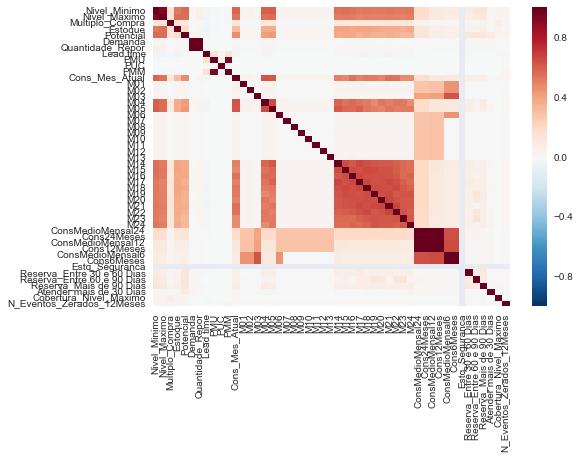

In [20]:
import seaborn as sns
corr = StockoutDataset[NumericalVariables].corr(method='pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Correlação entre variáveis numericas usando o método de correlação de Spearman

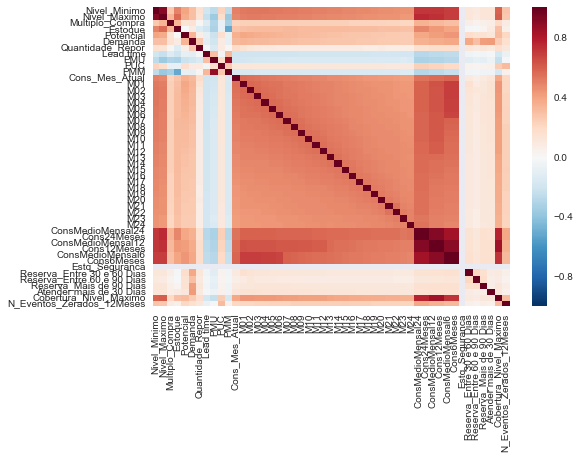

In [33]:
corr = StockoutDataset[NumericalVariables].corr(method='spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Correlação entre variáveis numericas usando o método de correlação de Kendall

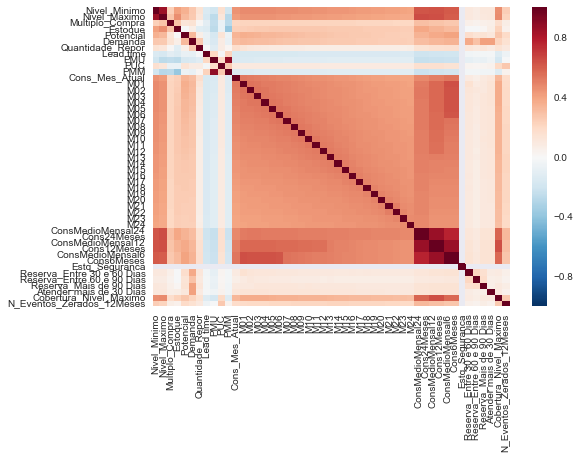

In [34]:
corr = StockoutDataset[NumericalVariables].corr(method='kendall')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Transformação em variáveis "dummy"

In [22]:
dummy = pd.get_dummies(StockoutDataset[CategoricalVariables], drop_first=True)

In [23]:
dummy

,Mes_Ano,Centro,Material,Status do item,Unidade de medida,Criticidade,Giro24Meses,Giro12Meses,Giro6Meses,Item importado,PRIORIDADE,Estrategia_Gestao
0,9,4127,15196700,10,17,2,0,0,0,0,2,1
1,9,4127,15197707,10,17,3,1,3,3,0,2,1
2,9,4127,15197712,10,17,3,3,3,3,0,2,1
3,9,4127,15197723,10,17,2,3,3,3,0,2,1
4,9,4127,15197746,10,17,3,3,3,3,0,2,1
5,9,4127,15197753,10,17,3,3,3,3,0,2,1
6,9,4127,15197778,10,17,3,1,3,3,0,2,1
7,9,4127,15197785,10,17,0,3,3,3,0,2,1
8,9,4127,15197786,10,17,3,3,3,3,0,2,1
9,9,4127,15198915,10,17,3,2,1,2,0,2,1


Execução e testes para o modelo de regressão logística

In [25]:
result = sm.Logit(StockoutOutput[0:int(0.8*StockoutDataset.shape[0])], dummy[0:int(0.8*StockoutDataset.shape[0])])
result = result.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.154238
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.260      
Dependent Variable:  Stockout         AIC:              283712.6589
Date:                2018-06-29 05:47 BIC:              283853.4398
No. Observations:    919648           Log-Likelihood:   -1.4184e+05
Df Model:            11               LL-Null:          -1.9160e+05
Df Residuals:        919636           LLR p-value:      0.0000     
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Mes_Ano           -0.0047   0.0010   -4.8052 0.0000 -0.0067 -0.0028
Centro            -0.0001   0.0000  -26.6

In [26]:
y_pred = result.predict(dummy[int(0.8*StockoutDataset.shape[0]):StockoutDataset.shape[0]]).round(0)

In [29]:
#print StockoutDataset[int(0.8*StockoutDataset.shape[0]):StockoutDataset.shape[0]]['Stockout']
newYpredict = y_pred
from sklearn.metrics import classification_report
print classification_report(StockoutOutput[int(0.8*StockoutDataset.shape[0]):StockoutDataset.shape[0]], newYpredict)
print("\n")
print pd.crosstab(StockoutOutput[int(0.8*StockoutDataset.shape[0]):StockoutDataset.shape[0]], newYpredict,rownames=['Valor real'], colnames=['Valor previsto'], margins=True)

             precision    recall  f1-score   support

          0       0.97      0.99      0.98    219923
          1       0.59      0.30      0.40      9990

avg / total       0.95      0.96      0.95    229913



Valor previsto     0.0   1.0     All
Valor real                          
0               217794  2129  219923
1                 6977  3013    9990
All             224771  5142  229913


In [1]:
#from imblearn.under_sampling import RandomUnderSampler

#StockoutDataset2 = StockoutDataset.drop('Stockout', 1)

#rus = RandomUnderSampler(random_state=0)
#X_resampled, y_resampled = rus.fit_sample(StockoutDataset2, StockoutDataset['Stockout'])

#print StockoutDataset.shape
#print X_resampled.shape
#print y_resampled.shape